<a href="https://colab.research.google.com/github/goneyacine/Learning-ML/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [113]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np

In [39]:
(train_set, test_set), ds_info = tfds.load('mnist', split=['train','test'], shuffle_files=True, as_supervised=True,with_info = True)
train_set = train_set.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
print(ds_info)

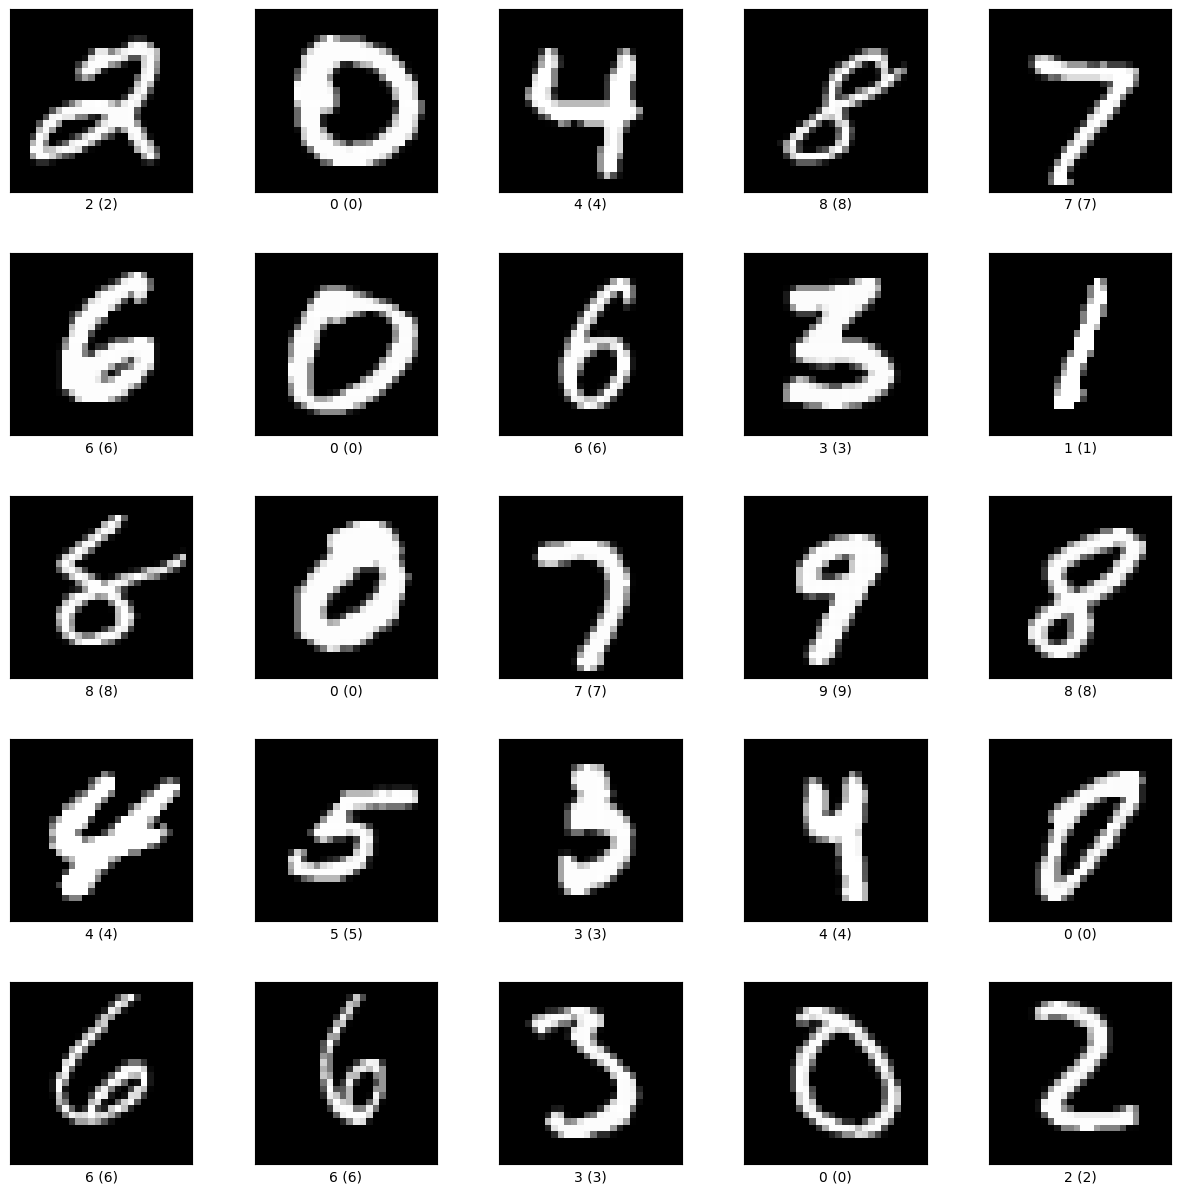

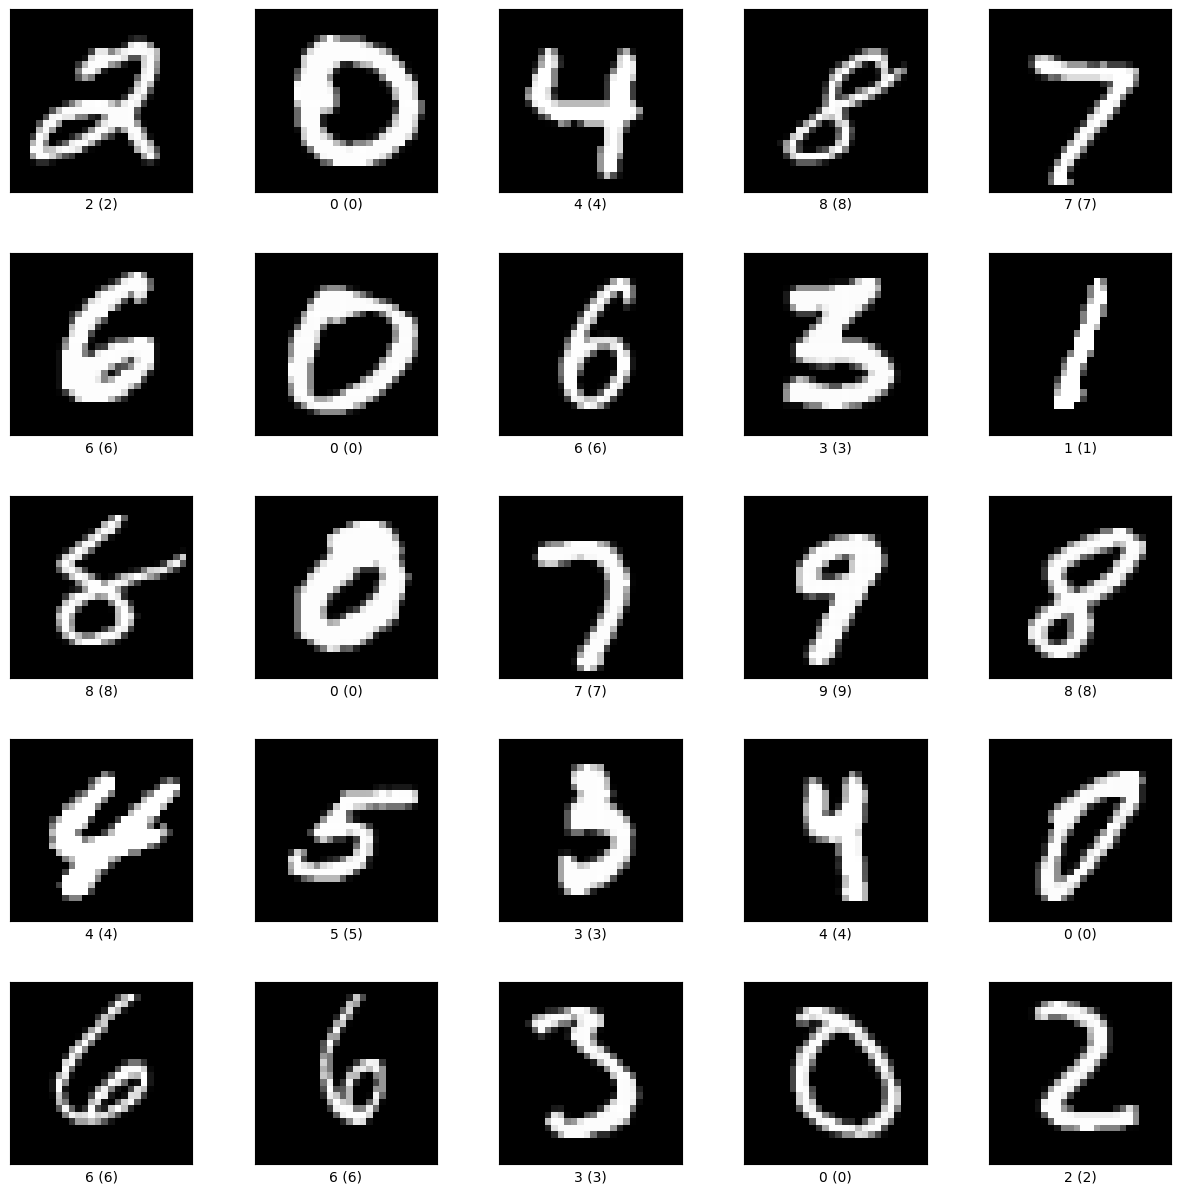

In [62]:
tfds.show_examples(test_set,ds_info,rows=5,cols=5)

In [28]:
def normalize_img(image,label):
  return tf.cast(image,tf.float32) / 255.0, label


In [41]:
train_set = train_set.map(normalize_img,num_parallel_calls=tf.data.AUTOTUNE)
test_set = test_set.map(normalize_img,num_parallel_calls=tf.data.AUTOTUNE)

In [139]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28,1)))
model.add(keras.layers.Dense(64,activation=tf.nn.relu))
model.add(keras.layers.Dense(28,activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

optimizer = keras.optimizers.Adam(0.001)
model.compile(loss="mse",optimizer=optimizer,metrics=["mae","mse"])
history = model.fit(train_set,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9807 - mae: 0.9863 - mse: 1.9807
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9668 - mae: 0.6570 - mse: 0.9668
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7599 - mae: 0.5579 - mse: 0.7599
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6256 - mae: 0.4905 - mse: 0.6256
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5410 - mae: 0.4433 - mse: 0.5410
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4689 - mae: 0.4057 - mse: 0.4689
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4198 - mae: 0.3776 - mse: 0.4198
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3712 - mae: 0.3522 - mse: 0.3712
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3386 - mae: 0.3358 - mse: 0.3386
E

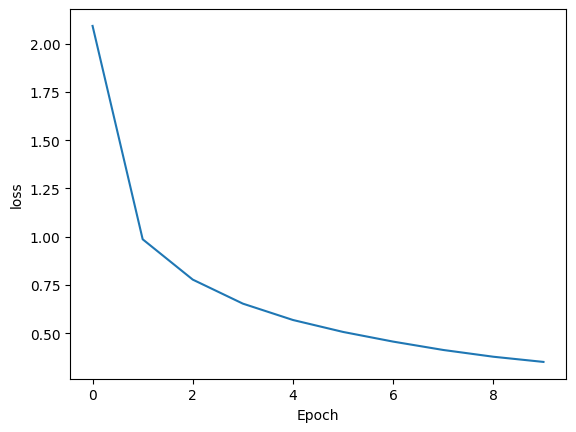

In [124]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.plot(history.epoch,history.history['loss'])
plt.show()

In [125]:
dataset_array = tf.data.Dataset.get_single_element(test_set.batch(len(test_set)))
x_test, y_test = dataset_array

In [126]:
loss,mae,mse = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5874 - mae: 0.4334 - mse: 0.5874


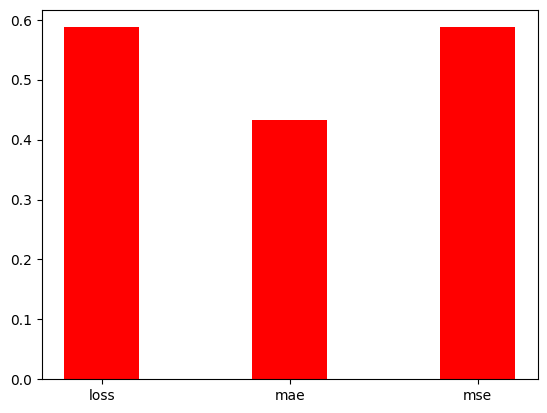

In [127]:
plt.figure()
plt.bar(["loss","mae","mse"],[loss,mae,mse],width = 0.4,color='red')
plt.show()

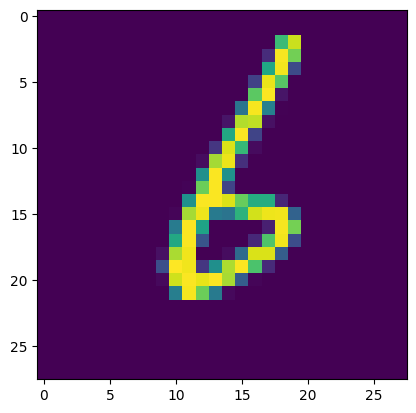

In [136]:
plt.imshow(x_test[2500])


In [134]:
model.predict(np.array([x_test[2500]]),verbose=0)


array([[5.958594]], dtype=float32)